In [1]:
# !pip install tensorflow

In [2]:
import tensorflow as tf
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-09-28 13:48:47.231516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 13:48:47.243557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 13:48:47.246830: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 13:48:47.254964: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 13:48:47.934627: W tensorflow/compiler/tf2

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

I0000 00:00:1727556528.494669  227423 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727556528.511154  227423 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727556528.511194  227423 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
# Define the input shape for the images (224x224 RGB images)
IMG_HEIGHT = 224
IMG_WIDTH = 224

input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

# Build the model
inputs = layers.Input(shape=input_shape)

# First Convolutional Block (7x7 Convolution with Stride 2, followed by Max Pooling)
x = layers.Conv2D(32, (7, 7), strides=(2, 2), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Second Convolutional Block (3x3 Convolution with Stride 1, followed by Max Pooling)
x = layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Third Convolutional Block
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Fourth Convolutional Block
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Global Average Pooling
x = layers.GlobalAveragePooling2D()(x)

# Dropout to prevent overfitting
x = layers.Dropout(0.3)(x)

# Fully Connected Layer with 10 units (corresponding to 10 classes)
NUM_CLASSES = 10
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Specify a lower learning rate (e.g., 0.0001)
LEARNING_RATE = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Compile the model with the specified learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

I0000 00:00:1727556528.524985  227423 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727556528.525074  227423 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727556528.525096  227423 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727556528.610554  227423 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727556528.610607  227423 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-28

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 112, 112, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,826 (1.51 MB)

 Trainable params: 394,826 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Data Augmentation setup
train_datagen = ImageDataGenerator(
    rotation_range=20,          # Rotate images by up to 20 degrees
    width_shift_range=0.2,      # Shift images horizontally by up to 20%
    height_shift_range=0.2,     # Shift images vertically by up to 20%
    shear_range=0.2,            # Shear transformation
    zoom_range=0.2,             # Zoom in on images by up to 20%
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill in missing pixels after transformations
)

# Load training data from directories
IMAGE_DIR = os.path.join(os.getcwd(), "..", "data", "imagenet_224")
BATCH_SIZE = 16
TARGET_SIZE = (IMG_WIDTH, IMG_HEIGHT)

# Image Dataset from Directory setup
# Automatically split the data into training (80%) and validation (20%)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    IMAGE_DIR,           # Replace with the path to your image directory
    validation_split=0.2,       # Use 20% of the data for validation
    subset="training",          # Use the training split
    seed=42,                    # Set a seed to ensure repeatability
    image_size=TARGET_SIZE,      # Resize images to 224x224
    batch_size=BATCH_SIZE               # Batch size for training
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    IMAGE_DIR,           # Same path to images
    validation_split=0.2,       # Use 20% of the data for validation
    subset="validation",        # Use the validation split
    seed=42,                    # Set a seed to ensure repeatability
    image_size=TARGET_SIZE,      # Resize images to 224x224
    batch_size=BATCH_SIZE               # Batch size for validation
)

Found 13738 files belonging to 10 classes.
Using 10991 files for training.
Found 13738 files belonging to 10 classes.
Using 2747 files for validation.


In [6]:
# Apply data augmentation to the training dataset
augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

# Apply the augmentation only on the training dataset
train_dataset = train_dataset.map(lambda x, y: (augmentation(x, training=True), y))

# Prefetch the datasets for performance improvement
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
# Train the model
EPOCHS = 30

history = model.fit(
    train_dataset,
    epochs=EPOCHS,                         # Adjust number of epochs as needed
    validation_data=validation_dataset
)

Epoch 1/30


I0000 00:00:1727556544.273461  227518 service.cc:146] XLA service 0x7fb7a4086d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727556544.273503  227518 service.cc:154]   StreamExecutor device (0): Quadro P2000, Compute Capability 6.1
2024-09-28 13:49:04.297531: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-28 13:49:04.420424: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  2/687 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.2188 - loss: 21.7973   

2024-09-28 13:49:13.936840: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1727556553.945004  227518 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


687/687 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.1840 - loss: 4.2720

2024-09-28 13:50:32.598470: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads



687/687 ━━━━━━━━━━━━━━━━━━━━ 97s 126ms/step - accuracy: 0.1840 - loss: 4.2695 - val_accuracy: 0.2603 - val_loss: 2.0817
Epoch 2/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.2966 - loss: 1.9106 - val_accuracy: 0.3360 - val_loss: 1.8619
Epoch 3/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.3386 - loss: 1.8022 - val_accuracy: 0.3928 - val_loss: 1.7402
Epoch 4/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.3738 - loss: 1.7360 - val_accuracy: 0.4110 - val_loss: 1.7147
Epoch 5/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.3981 - loss: 1.6699 - val_accuracy: 0.4212 - val_loss: 1.6713
Epoch 6/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.4127 - loss: 1.6314 - val_accuracy: 0.4114 - val_loss: 1.7056
Epoch 7/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.4150 - loss: 1.6086 - val_accuracy: 0.4514 - val_loss: 1.6288
Epoch 8/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.4361 - loss: 1.5480 - val

In [8]:
model.save(os.path.join("../data", "model_googlenet_simple.keras"))

In [9]:
import pickle

with open(os.path.join("../data", "history_googlenet_simple.pkl"), "wb") as file:
    pickle.dump(history, file)

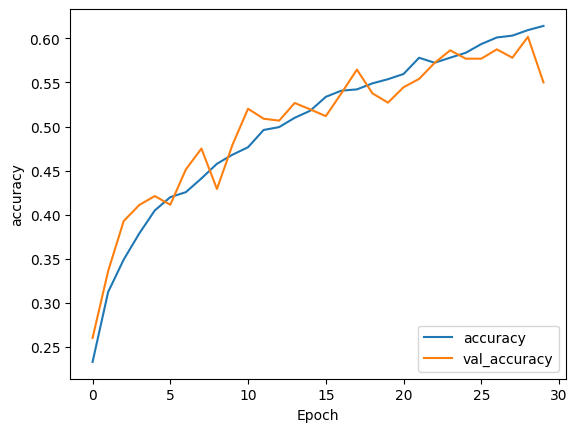

In [10]:
import matplotlib.pyplot as plt

def plot_accuracy_curve(training_result, metric):
    val_metric = f"val_{metric}"
    train_perf = training_result.history[metric]
    validation_perf = training_result.history[val_metric]
    
    plt.plot(train_perf, label=metric)
    plt.plot(validation_perf, label=val_metric)
    
    max_val = max(validation_perf)
    max_val_epoch = validation_perf.index(max_val)
    
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.legend(loc="lower right")
    
plot_accuracy_curve(history, "accuracy")  
# plot_accuracy_curve(history, "categorical_accuracy")
# plot_accuracy_curve(history, "top_k_categorical_accuracy")
# plot_accuracy_curve(history, "loss")

In [11]:
# Get the training accuracy values across epochs
train_acc = history.history['accuracy']

# Get the validation accuracy values across epochs (if needed)
val_acc = history.history['val_accuracy']

# Find the maximum accuracy and the corresponding epoch (for training)
max_train_acc = max(train_acc)
max_train_epoch = train_acc.index(max_train_acc) + 1  # Add 1 to get the correct epoch (since epochs are 1-indexed)

# If you want to find the max validation accuracy as well:
max_val_acc = max(val_acc)
max_val_epoch = val_acc.index(max_val_acc) + 1

# Print the results
print(f"Max Training Accuracy: {max_train_acc:.4f} at epoch {max_train_epoch}")
print(f"Max Validation Accuracy: {max_val_acc:.4f} at epoch {max_val_epoch}")

Max Training Accuracy: 0.6141 at epoch 30
Max Validation Accuracy: 0.6017 at epoch 29


In [12]:
# Extract training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Calculate the absolute difference between training and validation accuracy for each epoch
acc_diff = [abs(train - val) for train, val in zip(train_acc, val_acc)]

# Find the minimum difference and the corresponding epoch
min_diff = min(acc_diff)
min_diff_epoch = acc_diff.index(min_diff) + 1  # Add 1 to match the epoch (1-indexed)

# Get the accuracy and validation accuracy at that epoch
train_acc_at_min_diff = train_acc[min_diff_epoch - 1]  # Subtract 1 for zero-based indexing
val_acc_at_min_diff = val_acc[min_diff_epoch - 1]      # Subtract 1 for zero-based indexing

# Print the results
print(f"Minimum difference between accuracy and validation accuracy: {min_diff:.4f} at epoch {min_diff_epoch}")
print(f"Training Accuracy at epoch {min_diff_epoch}: {train_acc_at_min_diff:.4f}")
print(f"Validation Accuracy at epoch {min_diff_epoch}: {val_acc_at_min_diff:.4f}")


Minimum difference between accuracy and validation accuracy: 0.0001 at epoch 23
Training Accuracy at epoch 23: 0.5724
Validation Accuracy at epoch 23: 0.5723


In [14]:
UNSEEN_IMAGENET_IMG_DIR = os.path.join(os.getcwd(), "..", "data", "imagenet_224_eval")

eval_imagenet_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    UNSEEN_IMAGENET_IMG_DIR,           # Replace with the path to your image directory
    image_size=TARGET_SIZE,      # Resize images to 224x224
    batch_size=BATCH_SIZE               # Batch size for training
)

eval_imagenet_dataset = eval_imagenet_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

loss, accuracy = model.evaluate(eval_imagenet_dataset)
print(f"Loss on unseen ImageNet images: {loss:.4f}")
print(f"Accuracy on unseen ImageNet images: {accuracy:.4f}")

Found 1000 files belonging to 10 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5596 - loss: 1.3350
Loss on unseen ImageNet images: 1.3034
Accuracy on unseen ImageNet images: 0.5810


In [15]:
CIFAR10_IMG_DIR = os.path.join(os.getcwd(), "..", "data", "cifar-10")

eval_cifar_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    CIFAR10_IMG_DIR,           # Replace with the path to your image directory
    image_size=TARGET_SIZE,      # Resize images to 224x224
    batch_size=BATCH_SIZE               # Batch size for training
)

eval_cifar_dataset = eval_cifar_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

loss, accuracy = model.evaluate(eval_cifar_dataset)
print(f"Loss on CIFAR-10 images: {loss:.4f}")
print(f"Accuracy CIFAR-10 images: {accuracy:.4f}")

Found 10000 files belonging to 10 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2118 - loss: 2.8385
Loss on CIFAR-10 images: 2.8327
Accuracy CIFAR-10 images: 0.2136
